#Giorgio Mendoza
#CS539-F23-F02
#Dr. J. Sethi

#Lab_3-1: Classifying Fruits
#Please answer the questions by filling in the code where indicated below

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
%matplotlib inline

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [4]:
# You should write your whole answer within the function provided, with special emphasis on the return value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer
    return len(cancer['feature_names'])

# You can examine what your function returns by calling it in the cell
answer_zero()

30

## Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things like munging data easier, so let's practice creating a classifier with a pandas DataFrame.


Convert the sklearn.dataset `cancer` to a DataFrame.

*This function should return a* `(569, 31)`  *DataFrame with columns =*
`    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
`
*and index =* `RangeIndex(start=0, stop=569, step=1)`

In [5]:
def answer_one():
    from sklearn.datasets import load_breast_cancer
    import pandas as pd

    #load dataset
    cancer = load_breast_cancer()

    #create a DataFrame from data
    cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

    #add target column to DataFrame
    cancer_df['target'] = cancer.target

    return cancer_df

df = answer_one()
print(df.shape)
print(df.columns)
print(df.index)

(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
RangeIndex(start=0, stop=569, step=1)


## Question 2
What is the class distribution? (i.e. how many instances of `malignant` (encoded 0) and how many `benign` (encoded 1)?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [6]:
#return class distribution of breast cancer dataset
def answer_two():
    cancerdf = answer_one()

    #counting instances of malignant (0) and benign (1)
    counts = cancerdf['target'].value_counts()
    counts.index = ['malignant', 'benign']

    return counts

answer_two()

malignant    357
benign       212
Name: target, dtype: int64

Question 3
Split the DataFrame into X (the data) and y (the labels).

This function should return a tuple of length 2: (X, y), where X, a pandas DataFrame, has shape (569, 30)

y, a pandas Series, has shape (569,)

In [7]:
#split DataFrame into X (data) and y (labels)
def answer_three():
    cancerdf = answer_one()

    #splitting DataFrame into X and y
    X = cancerdf.drop('target', axis=1)
    y = cancerdf['target']

    return (X, y)

#check shape of X and y
X, y = answer_three()
(X.shape, y.shape)


((569, 30), (569,))

## Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the solution!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`
*where* `X_train` *has shape* `(426, 30)`
`X_test` *has shape* `(143, 30)`

`y_train` *has shape* `(426,)`

`y_test` *has shape* `(143,)`

In [8]:
from sklearn.model_selection import train_test_split

#split X and y into training and test sets
def answer_four():
    X, y = answer_three()

    #split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    return (X_train, X_test, y_train, y_test)

#check shapes of returned values
X_train, X_test, y_train, y_test = answer_four()
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((426, 30), (143, 30), (426,), (143,))

## Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a* `sklearn.neighbors.classification.KNeighborsClassifier`.


In [9]:
from sklearn.neighbors import KNeighborsClassifier

#fit a k-nearest neighbors classifier
def answer_five():
    X_train, X_test, y_train, y_test = answer_four()

    #creating and training k-nearest neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    return knn

knn_classifier = answer_five()
knn_classifier

KNeighborsClassifier(n_neighbors=1)

## Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

*This function should return a numpy array either `array([ 0.])` or `array([1.])`*

In [10]:
#predict the class label using mean value for each feature
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)

    #get trained knn classifier from previous function
    knn = answer_five()

    #predict class label
    prediction = knn.predict(means)

    return prediction

answer_six()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

## Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [11]:
#predict the class labels for test set X_test
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()

    #predicting the class labels for test set
    test_predictions = knn.predict(X_test)

    return test_predictions

answer_seven()

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

## Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [12]:
#find the score (mean accuracy) of knn classifier
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()

    #calculating score (mean accuracy) of classifier
    score = knn.score(X_test, y_test)

    return score

answer_eight()

0.916083916083916

## Optional plot
Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

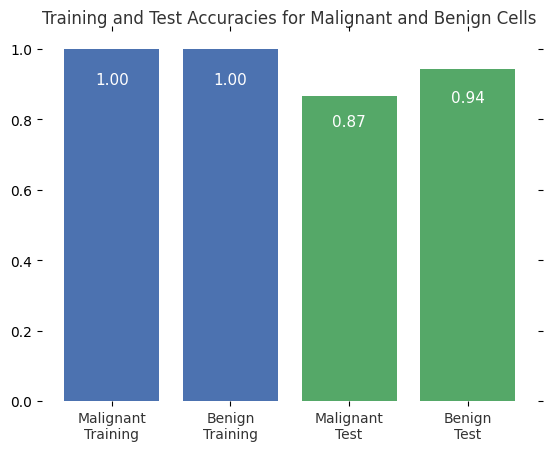

In [13]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y),
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

accuracy_plot()

#Answer:
The plot above shows that the classifier has learned to distinguish between malignant and benign cells quite well, with perfect accuracy on the training set and high accuracy on the test set.
However, there is a decrease in accuracy from training to testing, especially for malignant cells, which might indicate overfitting to the training data or that the model finds malignant cells slightly more challenging to classify accurately in new data.
The higher accuracy for benign cells in the test set suggests that the model is more reliable in classifying benign instances.
